# Filtro de partículas - 2019



Cada partícula vai ser representada por um objeto da classe `Particle`, do arquivo `pf.py`, que contém os atributos `x`,`y`,`theta` e `W`. `W` é a probabilidade. 

Todo seu código deve ficar no arquivo `projeto_pf.py`, que deve ficar num repositório privado no  **Githubb**. Você deve adicionar os professores  em seu repositório (fabiomiranda@insper.edu.br  e antoniohps@gmail.com )


Trabalhe com 2 listas:

	S = []  # Vai conter as n partículas. 

	W = [] # Pesos das partículas

	n_part = # Número de partículas


# Atividades


1. Crie uma função que gere n partículas aleatórias distribuídas uniformemente dentro de uma área minx, miny, maxx, maxy, n_particulas (passados como parâmetros). Veja a funcao `create_particles` no módulo `pf` para se inspirar. Sua função deve se chamar `create_random_particles`

	Devolve uma lista com n partículas

2. Descubra como desenhar as n partículas (analise o módulo inspercles) [pronto]

3. Faça o desenho das partículas [pronto]

4. Crie uma lista para simular os movimentos do robô (só para o Jupyter, na versão Pygame o movimento vem até você). Veja a lista chamada <code>movimentos</code> que é usada na seção *Teste de animação*, mais abaixo [desenho o robô deslocado]

5. Crie uma função que aplica um deslocamento [delta_x, delta_y, delta_theta] normal com um desvio padrão [std_x, std_y, std_theta] a todas as partículas

6. Desenhe as partículas após o deslocamento [pronto]

7. Descubra como calcular $P(D|H)$ analisando o Python Notebook. A função que traça os raios está no modulo inspercles

Programe a aplicação da equação que está na pág. 853 do livro do Norvig $$P(z_t | x_t) = \alpha \prod_{j}^M{e^{\frac{-(z_j - \hat{z_j})}{2\sigma^2}}}$$

Ou seja, para cada raio estimado $\hat{z_j}$ e leitura real $z_j$ calcule a probabilidade daquele raio  real ter acontecido se o robô estivesse na posição em que a partícula está

Lembre-se de que para nossos fins $P(z_t | x_t)$ é $P(D|H)$.




8 . Usando os resultados de 7 calcule $P(H|D)$ e insira numa lista de probabilidades das partículas

9 . Reamostre as partículas de forma proporcional à probabilidade



In [1]:
import graphics_nb
import projeto_pf # Aqui fica o seu trabalho
import numpy as np

from pf import Particle

import inspercles
import importlib
importlib.reload(inspercles)
import math


# Para suprimir alguns warnings do Matplotlib Inline
import warnings
warnings.simplefilter('ignore')
%matplotlib inline


## Diretório de trabalho

In [2]:
!pwd




/Users/mirwox/robot/src/particle


In [3]:
particle_size = 10


initial_pose = [200, 200, math.pi/8] # Posicao inicial considerada para o pf
inspercles.initial_pose = initial_pose
pose = [330, 220, math.radians(90)] # posicao "verdadeira" do robo 
inspercles.pose = pose
robot_radius=10   # Raio do robo
inspercles.robot_radius = robot_radius



projeto_pf.robot.set_pose(initial_pose)
projeto_pf.particle_cloud = projeto_pf.create_random_particles()



    

## Mapa com posição inicial

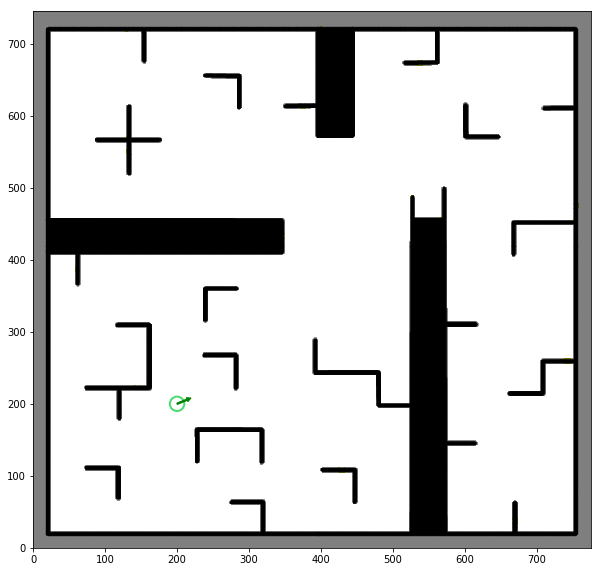

In [4]:
graphics_nb.draw_map(projeto_pf.robot)

A função *nb_initialize_particle_cloud()* pertence ao módulo <code>inspercles</code> e já faz uma primeira aleatorização das partículas

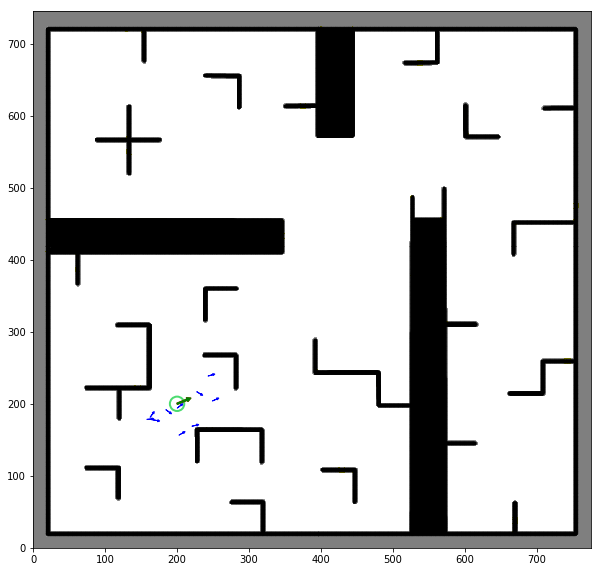

In [5]:
graphics_nb.draw_map_particles(particles = projeto_pf.particle_cloud, robot = projeto_pf.robot)

# Simulação da imagem do laser

Para simular a leitura **real** do robo, use *nb_simulate_lidar* passando a posição real do robô, os ângulos do sensor e a np_image com o mapa

In [6]:
#leituras = inspercles.nb_lidar(projeto_pf.robot, projeto_pf.angles)
leituras, inspercles.lidar_map = inspercles.nb_simulate_lidar_fast(projeto_pf.robot.pose(), projeto_pf.angles, inspercles.np_image)


TypeError: Image data cannot be converted to float

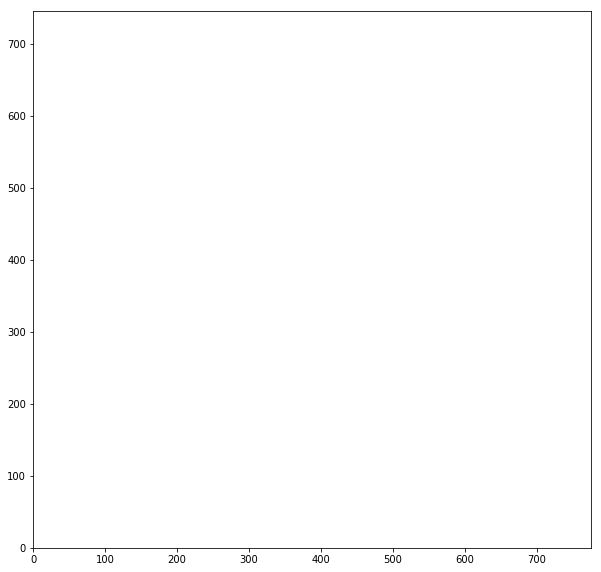

In [12]:
#graphics_nb.draw_laser(leituras)
#nb_draw_map(occupancy_image)

ax = inspercles.nb_draw_map(inspercles.lidar_map, robot=True, pose=projeto_pf.robot.pose())
ax.imshow(inspercles.color_image, alpha=0.8)

As leituras serao retornadas pela simulacao do lidar. Sao armazenadas na forma de um dicionario com angulo: valor da leitura

In [8]:
# As predicoes teoricas das leituras
leituras

{1.5707963267948966: 187.0,
 2.356194490192345: 63.63961030678928,
 3.141592653589793: 306.0,
 3.9269908169872414: 73.53910524340094,
 4.71238898038469: 204.0,
 5.497787143782138: 152.73506473629422,
 6.283185307179586: 146.0,
 7.0685834705770345: 82.02438661763951,
 7.853981633974483: 187.0}

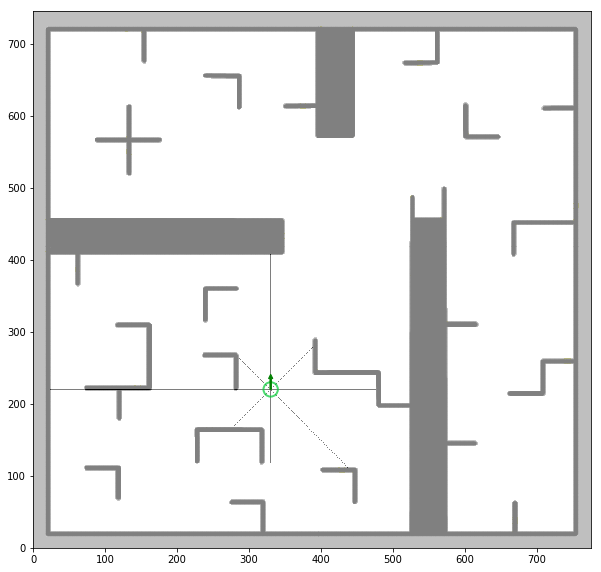

In [9]:
ax = inspercles.nb_draw_map(inspercles.lidar_map, pose=projeto_pfpose, robot=True)
#ax.imshow(occupancy_image, alpha=0.2)
ax.imshow(inspercles.pil_image, alpha=0.5)

In [11]:
ax = inspercles.nb_draw_map(inspercles.pil_image, pose=pose, robot=True, particles=projeto_pf.particulas)
#ax.imshow(occupancy_image, alpha=0.2)
ax.imshow(lidar_map, alpha=0.5)

NameError: name 'particulas' is not defined

## Gerando uma animação

In [ ]:
# Coloque nesta lista os deslocamentos do robo

# Lista mais longa
movimentos_longos = [[-10, -10, 0], [-10, 10, 0], [-10,0,0], [-10, 0, 0],
              [0,0,math.pi/12.0], [0, 0, math.pi/12.0], [0, 0, math.pi/12],[0,0,-math.pi/4],
              [-5, 0, 0],[-5,0,0], [-5,0,0], [-10,0,0],[-10,0,0], [-10,0,0],[-10,0,0],[-10,0,0],[-15,0,0],
              [0,0,-math.pi/4],[0, 10, 0], [0,10,0], [0, 10, 0], [0,10,0], [0,0,math.pi/8], [0,10,0], [0,10,0], 
              [0,10,0], [0,10,0], [0,10,0],[0,10,0],
              [0,0,-math.radians(90)],
              [math.cos(math.pi/3)*10, math.sin(math.pi/3),0],[math.cos(math.pi/3)*10, math.sin(math.pi/3),0],[math.cos(math.pi/3)*10, math.sin(math.pi/3),0],
              [math.cos(math.pi/3)*10, math.sin(math.pi/3),0]
              
              ]

# Lista curta
movimentos_curtos = [[-10, -10, 0], [-10, 10, 0], [-10,0,0], [-10, 0, 0]]

movimentos = movimentos_curtos



Atenção: quando for gerar os arquivos png da entrega por favor apague todos os arquivos do tipo anim*png antes de gerar a versão final

In [ ]:
# No Windows: 
!del anim*png

In [ ]:
# No Linux ou Mac
! rm anim*png

In [ ]:

plt.ioff() # Desliga o modo interativo, para nao aparecerem muitas imagens no meio por causa da animação

frames = 1



for delta in movimentos:

    for i in range(len(pose)):
        pose[i]+=delta[i]

        
    # Para deixar menos lento
        
        
    # Simula a leitura do lidar
    leituras, lidar_map = inspercles.nb_simulate_lidar_fast(pose, angles, np_image, output_image=True, retorno=retorno_lidar_robo)

    
    
    # Desenha as particulas
    ax = inspercles.nb_draw_map(color_image, pose=pose, robot=True, particles=particulas)
    #ax.imshow(occupancy_image, alph.2)
    # Desenha o mapa do lidar
    ax.imshow(lidar_map, alpha=0.5)
    
    plt.savefig("anim%04d.png"%frames, bounds="tight")
    
    frames+=1
    plt.close('all')


plt.ion()



Para gerar os gifs é preciso ter o pacote *imagemagick*

O imagemagick pode ser obtido com o seguinte comando:
    sudo apt-get install imagemagick 
    
Agora vamos invocar na linha de comando o seguinte comando:
    convert -delay 10 -loop 1 anim*png animated.gif
    
Este comando criou um arquivo chamado *animated.fig*, que leremos abaixo:
    

In [ ]:
!convert -delay 10 -loop 1 anim*png animated.gif

Infelizmente o IPython Notebook 2 nao parece exibir animacoes em Gif por default, mas voce pode abrir o arquivo no diretorio de trabalho e devera'  ve-lo.

<img src="animated.gif">

![](anim.gif)